# Multi-Variate Time Series Prediction 

by Munir Yousef


Introduction 

This analysis will attempt to predict the future price of gold using the historical fluctuating values of gold, 
oil and the dollar. 

The data ranging from November 24th 2006 to March 4th 2020, consisting of 4851 rows of data,
pulled and compiled from Investing.com 



## Imports

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas import read_csv
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import os 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import time 


#Keras imports

from tensorflow.python.keras.models import Sequential
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [163]:
#Load the data
df = pd.read_csv('golddata.csv') 

In [164]:
df.head()

,Date,Price_Oil,Price_Dollar,Price_Gold
0,3/4/20,47.34,97.34,"1,637.70"
1,3/3/20,47.18,97.15,"1,644.40"
2,3/2/20,46.75,97.36,"1,594.80"
3,3/1/20,44.76,98.13,"1,566.70"
4,2/29/20,47.09,98.51,"1,642.50"


In [165]:
df.values.shape

(4850, 4)

In [166]:
print(df.dtypes)

Date             object
Price_Oil       float64
Price_Dollar    float64
Price_Gold       object
dtype: object


In [167]:
#Change value of date to datetime
df["Price_Gold"] = df["Price_Gold"].str.replace(",","").astype(float)


In [168]:
df['Date'] =  pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head(3)

,Price_Oil,Price_Dollar,Price_Gold
Date,,,
2020-03-04,47.34,97.34,1637.7
2020-03-03,47.18,97.15,1644.4
2020-03-02,46.75,97.36,1594.8


In [169]:
print(df.dtypes)

Price_Oil       float64
Price_Dollar    float64
Price_Gold      float64
dtype: object


In [170]:
df.head()

,Price_Oil,Price_Dollar,Price_Gold
Date,,,
2020-03-04,47.34,97.34,1637.7
2020-03-03,47.18,97.15,1644.4
2020-03-02,46.75,97.36,1594.8
2020-03-01,44.76,98.13,1566.7
2020-02-29,47.09,98.51,1642.5


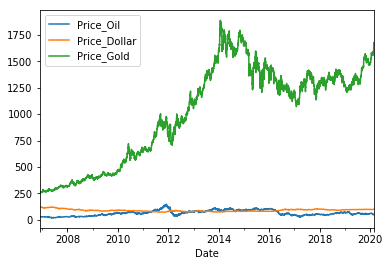

In [171]:
#plot our dataset
df.plot()

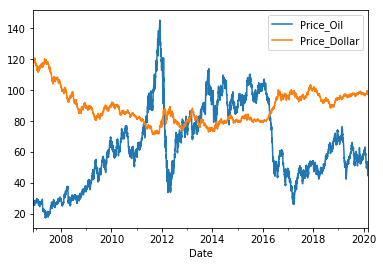

In [172]:
#visualize value fluctuations of Oil and the Dollar
df.plot(y = ['Price_Oil', 'Price_Dollar'])

In [173]:
df['Various', 'Day'] = df.index.dayofyear
df['Various', 'Hour'] = df.index.hour

In [244]:
%%time
df = Price_Gold.resample()

NameError: name 'Price_Gold' is not defined

In [174]:
#Setting the target of the value we wish to predict
target_value = 'Price_Gold'

In [175]:
#Indicating how far ahead we will base our predictions 
shift_days = 1 
shift_steps = shift_days * 24

In [176]:
#function to indicate a reverse time shift
df_targets = df[target_value].shift(-shift_steps)

In [177]:
df[target_value].head(shift_steps + 5)

Date
2020-03-04    1637.70
2020-03-03    1644.40
2020-03-02    1594.80
2020-03-01    1566.70
2020-02-29    1642.50
2020-02-28    1643.10
2020-02-27    1650.00
2020-02-26    1676.60
2020-02-25    1648.80
2020-02-24    1620.50
2020-02-23    1611.80
2020-02-22    1603.60
2020-02-21    1587.05
2020-02-20    1586.25
2020-02-19    1586.40
2020-02-18    1578.80
2020-02-17    1571.60
2020-02-16    1570.10
2020-02-15    1579.50
2020-02-14    1573.40
2020-02-13    1570.00
2020-02-12    1562.80
2020-02-11    1555.50
2020-02-10    1582.40
2020-02-09    1587.90
2020-02-08    1589.20
2020-02-07    1576.00
2020-02-06    1575.80
2020-02-05    1583.70
Name: Price_Gold, dtype: float64

In [178]:
df_target.head(5)

Date
2020-03-04    1587.9
2020-03-03    1589.2
2020-03-02    1576.0
2020-03-01    1575.8
2020-02-29    1583.7
Name: Price_Gold, dtype: float64

In [179]:
#Null values are returned because we have shifted to data non existent in original data frame
df_target.tail()

Date
2006-11-28   NaN
2006-11-27   NaN
2006-11-26   NaN
2006-11-25   NaN
2006-11-24   NaN
Name: Price_Gold, dtype: float64

In [180]:
#Input output data
x_data = df.values[0:-shift_steps]

In [181]:
#View numpy arrays
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (4826, 5)


In [182]:
y_data = df_target.values[:-shift_steps]

In [183]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (4826,)


In [184]:
#Reshape array from 1D to 2D 
y_data = y_data.reshape((y_data.shape[0], 1))
y_data.reshape(y_data.shape[0],-1)

array([[1587.9],
       [1589.2],
       [1576. ],
       ...,
       [ 266.8],
       [ 271.6],
       [ 270.8]])

In [185]:
#Training split
train_split = 0.8

In [186]:
#The number of samples in the set
num_data = len(x_data)
num_data

4826

In [187]:
#Number of training instances
num_train = int(train_split * num_data)
num_train

3860

In [188]:
#Number of test instances
num_test = num_data - num_train
num_test

966

In [189]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

4826

In [190]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

4826

In [191]:
#number of input signals
num_x_signals = x_data.shape[1]
num_x_signals

5

In [192]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [193]:
#Wide range of values 
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1888.7


Neural Networks are optimized to run on values between -1 and 1 so we will scale the range of the data down

In [194]:
#Here we create a scaler object for the values using a scikit-learn function
x_scaler = MinMaxScaler()

In [195]:
#Scale the training data down 
x_train_scaled = x_scaler.fit_transform(x_train)

In [196]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000002


In [197]:
x_test_scaled = x_scaler.transform(x_test)

In [198]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [199]:
#The array shapes of our converted data into 2D arrays
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(3860, 5)
(3860, 1)


## Batch Sequence 

In [200]:
#This function is used to create random batches of training data

def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [201]:
batch_size = 256

In [202]:
#This sequence contains observations spanning 8 weeks 
sequence_length = 24 * 7 * 8
sequence_length

1344

In [203]:
#Batch Generator
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [204]:
#This will test the generator
x_batch, y_batch = next(generator)

In [205]:
print(x_batch.shape)
print(y_batch.shape)

(256, 1344, 5)
(256, 1344, 1)


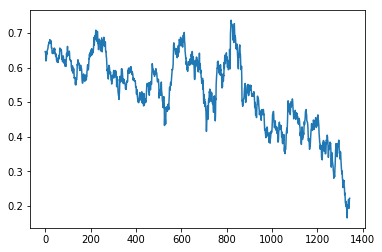

In [206]:
#Plot of batch example of our input signals
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

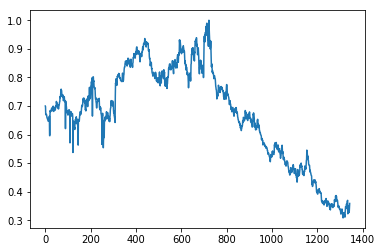

In [207]:
#This shows the output of our prediction given those input signals
seq = y_batch[batch, :, signal]
plt.plot(seq)

## Validation Set 

In [208]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

## Create Recurrent Neural Network (RNN) 

In [209]:
model = Sequential()

In [210]:
#Adding Gated Recurrent Unit (GRU) that will produce 512 outputs for each sequence. 
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

In [211]:
#Use Sigmoid function to condense output to values between 0 and 1 
model.add(Dense(num_y_signals, activation='sigmoid'))

In [212]:
#Drawback of sigmoid function is that it will only output values in the same range as training data. 
#We can use a linear activation function on the output to take on arbitrary values.
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

Using a Mean Squared Error as a loss-function will measure how closely the models output matches true output signals the beginning of the sequence may generate inaccurate results since it has only seen a few iterations, this can be solved by giving the model a warmup period which will hopefully improve our accuracy


In [213]:
warmup_steps = 20

In [214]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [215]:
#Assemble our model
optimizer = RMSprop(lr=1e-3)
disable_eager_execution()

In [216]:
#Compile Keras model

model.compile(loss=loss_mse_warmup, optimizer=optimizer)

TypeError: mean_squared_error() got an unexpected keyword argument 'labels'

In [217]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 512)         795648    
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           513       
Total params: 796,161
Trainable params: 796,161
Non-trainable params: 0
_________________________________________________________________


In [218]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [219]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [220]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [221]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [222]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [223]:
%%time
model.fit(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

TypeError: Unrecognized keyword arguments: {'generator': <generator object batch_generator at 0x000002B186FC0A20>}

In [224]:
# If you have several metrics.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [226]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_value)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_value[signal])
        plt.legend()
        plt.show()

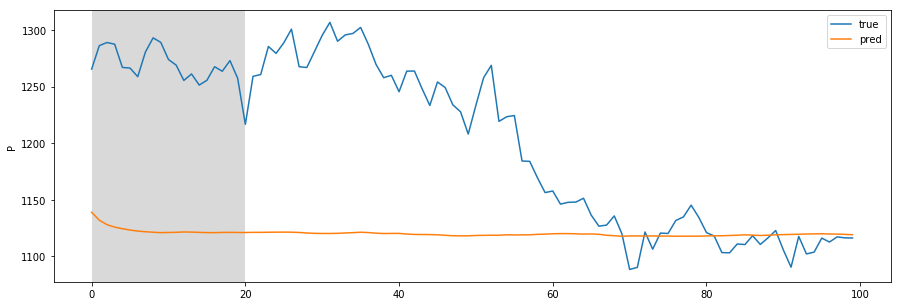

IndexError: index 1 is out of bounds for axis 1 with size 1

In [227]:
plot_comparison(start_idx=1000, length=100, train=True)

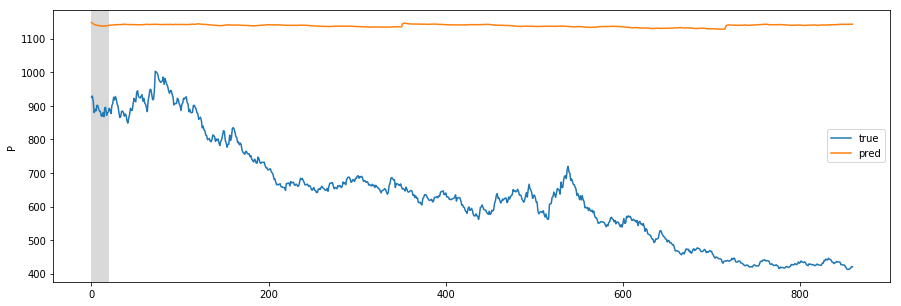

IndexError: index 1 is out of bounds for axis 1 with size 1

In [235]:
plot_comparison(start_idx=3000, length=1000, train=True)